# Projet numérique - Calcul différentiel
Antoine Rousseau et David Castro

In [4]:
import autograd
import autograd.numpy as np

import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10] # [width, height] (inches).

import random

from IPython.display import display

In [5]:
def grad(f):
    g = autograd.grad
    def grad_f(x, y):
        return np.array([g(f, 0)(x, y), g(f, 1)(x, y)])
    return grad_f

In [6]:
def J(f):
    j = autograd.jacobian
    def J_f(x, y):
        return np.array([j(f, 0)(x, y), j(f, 1)(x, y)]).T
    return J_f

In [7]:
# On a dû modifier légèrement la fonction pour pouvoir mettre d'autres courbes sur le même graphique

def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    #fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    #ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

In [8]:
## Exemples de référence

def f1(x1, x2):
    x1 = np.array(x1)
    x2 = np.array(x2)
    return 3.0 * x1 * x1 - 2.0 * x1 * x2 + 3.0 * x2 * x2

def f2(x1, x2):
    return (x1 - 1)**2 + (x1 - x2**2)**2

def f3(x, y):
    return np.sin(x + y) - np.cos(x * y) - 1 + 0.001 * (x * x + y * y)

# Question 1

La courbe de niveau $c$ de $f$ est bornée car, par hypothèse, il existe $A \in \mathbb R$ tel que :
$\forall x \in \mathbb R^2, \vert \vert x \vert \vert \geqslant A \implies f(x) \geqslant c + 1$.
Elle est donc incluse dans $\mathcal B (0, A)$.

C'est également un fermé car $\{c\}$ est un fermé de $\mathbb R$ donc, par
continuité de $f$, $f^{-1}(\{c\})$ est fermé dans $\mathbb R^2$. 

Comme on est en dimension finie, la courbe de niveau $c$ de $f$ est donc un compact de $\mathbb R^2$.

# Question 2

$ \mathbf u =\frac{1}{\vert \vert \nabla f(x_0)\vert \vert}(\partial_2 f(x_0), -\partial_1 f(x_0))$
est le vecteur normé tangent à la courbe de niveau en $x_0$ vers "la droite" quand on regarde dans la direction de
$\nabla f(x_0)$.

En effet, on sait que le gradient en $x_0$ est normal à la courbe. Or
$R = 
\begin{pmatrix}
    0 & 1 \\ -1 & 0
\end{pmatrix}
$
est la matrice de rotation d'angle $-\frac{\pi}{2}$ et $\mathbf u = R \cdot \nabla f(x_0)$.

Donc en notant le vecteur $X = x - x_0$, on obtient $p(x) = (\mathbf u \vert X)$ : $p(x)$ correspond à la projection 
"vers la droite" de $X$ sur la tangente à la courbe en le point considéré.

In [9]:
# Utile pour les tâches 4 et 7

def p(f, x0, y0, x, y):
    n = grad(f)(x0, y0)
    d = np.sqrt(n.dot(n))
    n = n/d
    v = np.array([y0 - y, x - x0])
    return n.dot(v)

# Question 3

On pose $F: (x, t) \in \mathbb R^2 \times \mathbb R \mapsto (f(x) - c, p(x) - t) \in \mathbb R^2$.

On a bien $F$ continûment dérivable car $f$ l'est et $p$ est polynômiale et $(x_0, 0)$ solution de $F(x) = 0$.

De plus, si $(x, t) \in \mathbb R^2 \times \mathbb R$,
$\partial_x F(x, t) =
\begin{pmatrix}
        \partial_1 f(x) &\partial_2 f(x) \\
        \frac{1}{\vert \vert \nabla f(x_0)\vert \vert} \partial_2 f(x_0) 
        &-\frac{1}{\vert \vert \nabla f(x_0)\vert \vert} \partial_1 f(x_0)
\end{pmatrix}$ 
de déterminant strictement négatif en $(x_0, 0)$ donc non nul sur un voisinage de $(x_0, 0)$ par continuité.

$\partial_x F$ est donc inversible sur un voisinage de $(x_0, 0)$.

Le théorème de la fonction implicite nous donne alors le résultat.

# Question 4

D'après le théorème de la fonction implicite, on a également
$\gamma'(t) = d\gamma (t) = -[\partial_x F(\gamma (t), t)]^{-1} \circ \partial_t F(\gamma (t), t)$.

Or, pour tout $(x, t) \in \mathbb R^2 \times \mathbb R$, $\partial_t F(x, t) = (0, -1)$ donc 
$\gamma' (t) = \Delta(\gamma (t)) \times (\partial_2 f(\gamma (t)), -\partial_1 f(\gamma (t)))$
où $\Delta(x) = \frac{\partial_1 f(x) \partial_1 f(x_0) + \partial_2 f(x) \partial_1 f(x_0)}
{\vert \vert \nabla f(x_0)\vert \vert}$.

Donc, par hypothèse, pour tout $t \in ]-\varepsilon, +\varepsilon[$, $\gamma'(t) \ne 0$.

On a bien $\gamma'(t)$ orthogonal à $\nabla f(\gamma(t))$.

# Question 5

L'objectif de la fonction Newton est de construire une représentation graphique des points solutions trouvés. Elle ne demande donc pas une très grande précision.

De plus, itérer la fonction Newton dans level_curve n'engendre pas un cumul des erreurs : l'approximation est à chaque étape, au pire, de l'ordre de eps. On n'a donc pas besoin d'augmenter la précision de la fonction Newton pour assurer
le bon fonctionnement de level_curve.

Prendre $\varepsilon = 10^{-7}$ semble donc raisonnable : cela assure une précision importante et, malgré cela, une exécution assez efficace.

In [10]:
N = 100
eps = 10**(-7)

## Tâche 1

In [11]:
def Newton(F, x0, y0, eps=eps, N=N):
    J_F = J(F)
    x, y = x0, y0
    for i in range(N):
        H = np.linalg.solve(J_F(x, y), F(x, y))
        x -= H[0]
        y -= H[1]
        if np.sqrt(H[0]**2 + H[1]**2) <= eps:
            return x, y
    else:
        raise ValueError(f"no convergence in {N} steps.")

## Tâche 2

In [12]:
def F(x1, x2):
    return np.array([3.0 * x1 * x1 - 2.0 * x1 * x2 + 3.0 * x2 * x2 - .8, x2 - x1])

X = Newton(F, .8, .8)
print(X)
f1(X[0], X[1])

(0.4472135954999579, 0.4472135954999579)


0.8

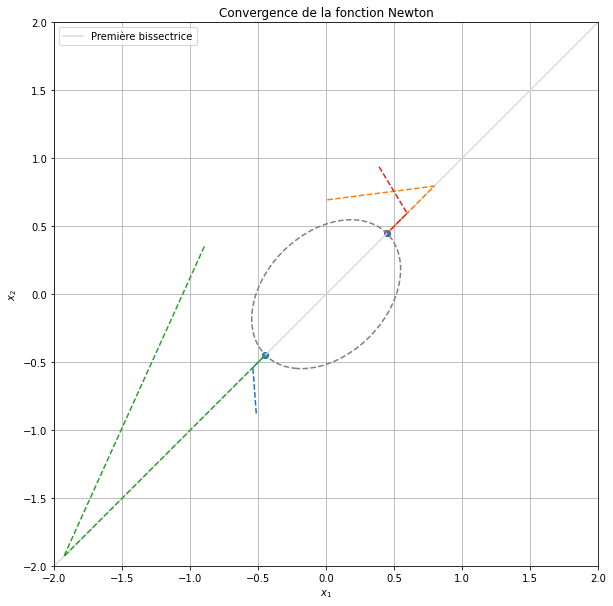

In [11]:
## Variation du point d'origine pour la courbe de niveau 0.8 de f1

# Pour suivre l'exécution, on considère une version modifiée qui renvoie les étapes successives

def Newton_step(F, x0, y0, eps=eps, N=N):
    J_F = J(F)
    res_X, res_Y = [x0], [y0]
    for i in range(N):
        x, y = res_X[-1], res_Y[-1]
        H = np.linalg.solve(J_F(x, y), -F(x, y))
        x += H[0]
        y += H[1]
        res_X.append(x)
        res_Y.append(y)
        if np.sqrt(H[0]**2 + H[1]**2) <= eps:
            return np.array(res_X), np.array(res_Y)
    else:
        raise ValueError(f"no convergence in {N} steps.")
        
# On affiche les courbes de niveau 0.8 de f1 et la première bissectrice

t = np.linspace(-2, 2, 400)

plt.plot(t, t, label = "Première bissectrice", color = 'gainsboro');
display_contour(f1, t, t, [.8])

plt.title('Convergence de la fonction Newton')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.legend()
        
# On va observer le comportement de Newton pour 4 points alétoires de [-1, 1] x [-1, 1]

n = 4

sol = np.empty((n, 2))

for i in range(n):
    x0, y0 = 2*random.random() - 1, 2*random.random() - 1
    X, Y = Newton_step(F, x0, y0)
    plt.plot(X, Y, '--');
    sol[i, :] = X[-1], Y[-1]

plt.scatter(sol[:, 0], sol[:, 1]); # ce sont les points solutions obtenus

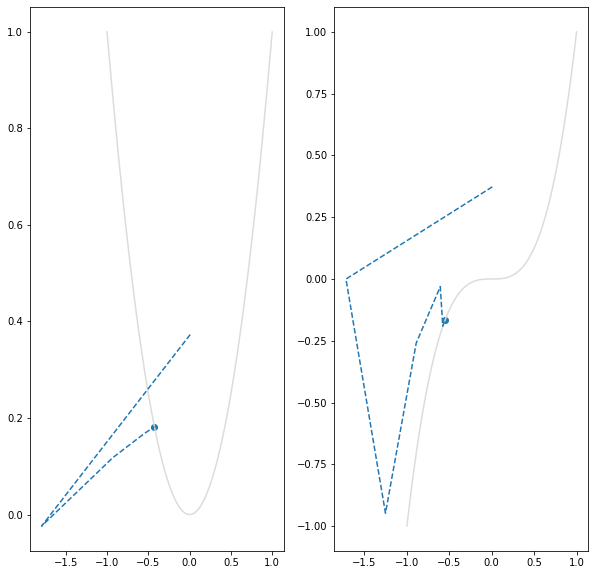

In [28]:
## On fait varier la contrainte

# On fait la même chose que précédemment mais avec les contraintes x2 = x1**2 et x2 = x1**3

def F_contrainteCarree(x1, x2):
    return np.array([3.0 * x1 * x1 - 2.0 * x1 * x2 + 3.0 * x2 * x2 - .8, x2 - x1**2])

def F_contrainteCube(x1, x2):
    return np.array([3.0 * x1 * x1 - 2.0 * x1 * x2 + 3.0 * x2 * x2 - .8, x2 - x1**3])

# On affiche les courbes associées à la contrainte considérée

fig, ax = plt.subplots(1, 2)

t = np.linspace(-1, 1, 200)

ax[0].plot(t, t**2, label = "Fonction carrée", color = 'gainsboro');
ax[1].plot(t, t**3, label = "Fonction cube", color = 'gainsboro');
        
# On va observer le comportement de Newton pour un point alétoire de [-1, 1] x [-1, 1]

while True:
    x0, y0 = 2*random.random() - 1, 2*random.random() - 1
    try:
        Xc, Yc = Newton_step(F_contrainteCarree, x0, y0)
        Xk, Yk = Newton_step(F_contrainteCube, x0, y0)
        ax[0].plot(Xc, Yc, '--');
        ax[0].scatter(Xc[-1], Yc[-1]);
        ax[1].plot(Xk, Yk, '--');
        ax[1].scatter(Xk[-1], Yk[-1]);
        break
    except ValueError:
        pass

In [ ]:
## On fait varier la fonction étudiée : nous allons faire un test similaire avec f3
## On prend la contrainte x1 = x2 et la courbe de niveau 0.8 en partant du point (0.1, 0.1)

def F3(x, y):
    return np.array([np.sin(x + y) - np.cos(x * y) - 1 + 0.001 * (x * x + y * y) - .8, y - x])

X = Newton(F3, .1, .1)
print(X)
f3(X[0], X[1])

# Question 6

## Tâche 3

 On itère sur la fonction Newton en prenant comme contrainte supplémentaire
 $p(x, y) = \delta$ avec la même défintion de la fonction $p$ qu'à la question 2.
 On utilise donc le résultat prouvé à la question 3.

In [13]:
def level_curve(f, x0, y0, delta=0.1, N=1000, eps=eps):
    xp, yp = x0, y0
    res = np.empty((2, N))
    res[:, 0] = x0, y0
    for i in range(1, N):
        def F(x, y):
            return np.array([f(x, y) -  c, p(f, xp, yp, x, y) - delta])
        cp = Newton(F, xp, yp, eps=eps)
        res[:, i] = cp
        xp, yp = cp
    return res

On ne réalise pas de test ici car pour les exemples que nous avons traités,
la fonction repasse un grand nombre de fois par le même endroit et est assez lente (parfois plusieurs dizaines pour
$N = 1000$). D'où la nécessité de la tâche 4.

# Question 7

## Tâche 4

Le principal risque est que la fonction traite plusieurs fois une même portion de courbe si elle a fait
"un tour". Dans ce cas, dans des conditions non pathologiques, réaliser le test seulement entre le premier
et le dernier segment suffit. 

Cependant, le programme pourrait faire non pas un tour mais une boucle si la fonction prise en argument est
auto-intersectant. On pourrait dans ce cas faire le test entre le dernier segment et tous ceux qui le précédent.
Avec un test d'intersection entre deux segements en $O(1)$, cela donnerait une complexité totale quadratique 
par rapport au paramètre $N$ dans le pire cas.

Nous avons choisi de ne pas le faire car, au niveau d'une auto-intersection, l'algorithme a potentiellement deux branches à explorer dont une ne l'a peut-être pas encore été. Il est impossible de prévoir a priori le comportement de l'algorithme mais arrêter le programme à ce moment, c'est se priver quoi qu'il arrive d'une exploration d'une "branche" non encore explorée.

Autrement dit, il faut tester avec le premier segment seulement car sinon des problèmes peuvent apparaître (courbe inachevée) comme dans le cas de la fonction de Rosenbrock.

In [14]:
def det(A, B, C):
    v1, v2 = B - A, C - A
    return v1[0]*v2[1] - v1[1]*v2[0]

La fonction det renvoie $\det (\vec{AB}, \vec{AC})$.

In [15]:
def in_seg(A, B, C):
    e = 10**(-8) # pour prendre en compte les erreurs d'arrondi liées aux doubles
    v1, v2 = B - A, C - A
    return np.abs(det(A, B, C)) <= e and v1[0]*v2[0] - v1[1]*v2[1] <= 0

La fonction in_seg renvoie true si et seulement si $A \in [B, C]$.

In [16]:
def intersection(A, B, C, D):
    e = 10**(-8)
    alignement = in_seg(A, C, D) or in_seg(B, C, D) or in_seg(C, A, B) or in_seg(D, A, B)
    c1, c2 = det(A, B, D), det(A, B, C)
    d1, d2 = det(D, C, A), det(D, C, B)
    return (c1*c2 < 0 and d1*d2 < 0) or alignement

La fonction intersection renvoie true si et seulement si les segements $[A, B]$ et $[C, D]$ s'intersectent.

La variable alignement anticipe les cas "pathologiques" où les segments s'intersectent en un des quatre points considérés. Pour les autres cas, on utilise l'équivalence suivante:

$[A, B] \cap [C, D] \neq \emptyset \iff [A, B] \cap (C, D) \neq \emptyset$ et $(A, B) \cap [C, D] \neq \emptyset$

En effet, on utilise le fait que si $\theta$ est l'angle orienté entre $u$ et $v$ alors
$\det(u, v) = \vert \vert u \vert \vert \vert \vert v \vert \vert \sin \theta$.

Or, la droite $(C, D)$ intersecte $] A, B [$ (le cas des extrêmités est traité dans alignement) si et seulement si les angles $(\vec{CD}, \vec{CA})$ et $(\vec{CD}, \vec{CB})$ ont des orientations strictement opposés donc si et seulement si $\det(\vec{CD}, \vec{CA}) \det(\vec{CD}, \vec{CB}) < 0$.

In [17]:
def level_curve_finie(f, x0, y0, delta = 0.1, N = 1000, eps = eps):
    xp, yp = x0, y0
    res = np.empty((2, N))
    res[:, 0] = x0, y0
    for i in range(1, N):
        def F(x, y):
            return np.array([f(x, y) - c, p(f, xp, yp, x, y) - delta])
        cp = Newton(F, xp, yp, eps=eps)
        res[:, i] = cp
        xp, yp = cp
        if i > 2 and intersection(res[:, 0], res[:, 1], res[:, i - 1], res[:, i]):
            print(f'{i} étapes nécessaires')
            return res[:, :i + 1:] # on ne renvoie que les points significatifs
    return res

On prend $i > 2$ car les deux premiers segments partagent dans tous les cas un point en commun et on ne veut pas que le programme s'arrête à la deuxième étape.

## Tâche 5

34 étapes nécessaires


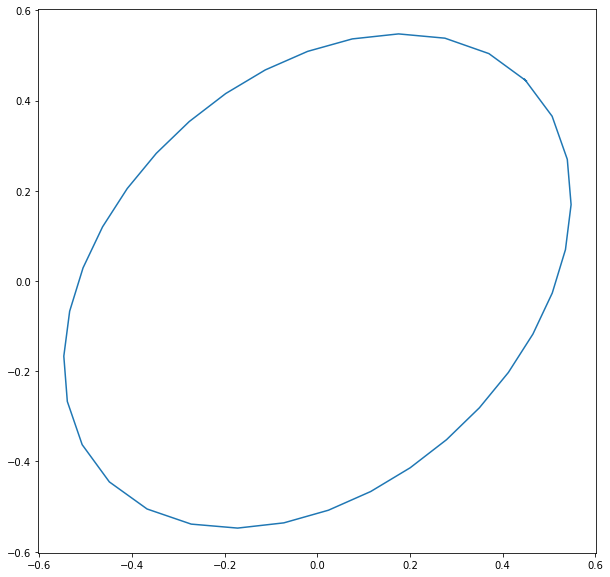

In [19]:
## On regarde pour la courbe de niveau 0.8 de la fonction f1

c = .8
x0, y0 = Newton(F, .6, .6)
T = level_curve_finie(f1, x0, y0)

plt.plot(T[0, :], T[1, :]);

95 étapes nécessaires


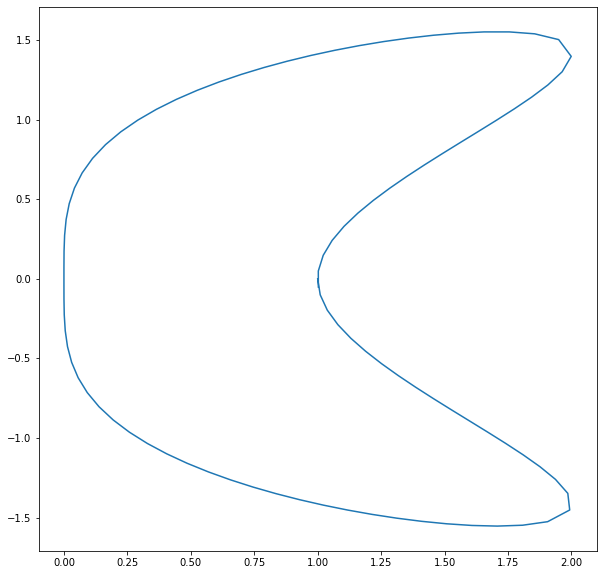

In [20]:
## On regarde pour la courbe de niveau 1.0 de la fonction f2

c = 1.
T = level_curve_finie(f2, 1., 0.)

plt.plot(T[0, :], T[1, :]);

122 étapes nécessaires


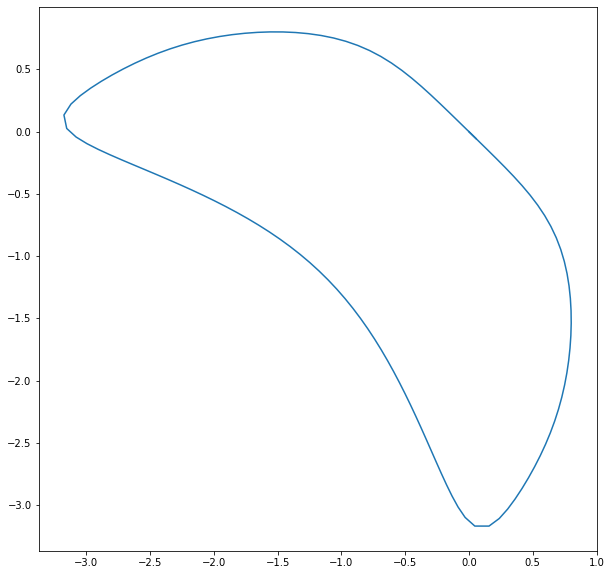

In [21]:
## On regarde pour la courbe de niveau f3(0., 0.) de la fonction f3

c = f3(0., 0.)
T = level_curve_finie(f3, 0., 0.)

plt.plot(T[0, :], T[1, :]);

# Question 8

Il faut :

$\begin{pmatrix} a \\ d \end{pmatrix} = \mathbf P_1$,
$\begin{pmatrix} a + b + c \\ d + e + f \end{pmatrix} = \mathbf P_2$,
$\begin{pmatrix} b \\ e \end{pmatrix} = \alpha \mathbf u_1$ et
$\begin{pmatrix} b + 2c \\ e + 2f \end{pmatrix} = \beta \mathbf u_2$
pour $a, b, c, d, e, f, g \in \mathbb R$ et $\alpha, \beta \in \mathbb R_+^*$.

Si une solution existe, $a$ et $d$ sont immédiatement déterminés.
Ce problème admet alors une solution si et seulement s'il existe $\alpha, \beta \in \mathbb R_+^*$ tel que
$2(\mathbf P_2 - \mathbf P_1) = \alpha \mathbf u_1 + \beta \mathbf u_2$.

En effet, si ce n'est pas le cas, il est clair que le problème n'admet pas de solution.

Réciproquement, si c'est la cas, on est ramené à la résolution d'un système linéaire de 6 inconnues 
à 6 équations. Ce système admet une solution.

## Tâche 6

In [22]:
def cns(P1, P2, u1, u2):
    v = 2*(P2 - P1)
    p = u1.dot(u2)
    p1 = v.dot(u1)
    p2 = v.dot(u2)
    n1 = u1.dot(u1)
    n2 = u2.dot(u2)
    A = np.array([[n1, p], [p, n2]])
    B = np.array([p1, p2])
    try:
        return np.linalg.solve(A, B)
    except LinAlgError: # si la matrice n'est pas inversible (quand u1 et u2 sont liés par cas d'égalité de Cauchy-Schwarz)
        return np.array([-1., -1.])

def solve(P1, P2, u1, u2):
    alpha, beta = cns(P1, P2, u1, u2)
    if alpha*beta >= 0 and alpha + beta > 0 # si les deux sont positifs et l'un non nul
    
    pass # là, à la place, on finit de résoudre le système

In [87]:
## A RECTIFIER

def gamma(t, P1, P2, u1, u2):
    if positivement_lies(P2 - P1, u2): # si le système admet une solution
        a, d = P1
        b, e = u1
        c, f = P2 - P1 - u1 # en prenant alpha = 1 avec les notations précédentes
        return np.array([a + b*t + c*t*t, d + e*t + f*t*t])
    P1.resize((2, 1)) # si le système n'admet pas de solution
    P2.resize((2, 1))
    # il faut t de la forme (1, len(t))
    # on resize t directement dans level_curve_interpole (car il n'est nécessaire que pour gamma)
    # pour éviter le problème de resize un np.ndarray qui partage une référence
    return P1 + (P2 - P1).dot(t)

In [80]:
# Test

P1 = np.array([0., 0.])
P2 = np.array([1., 1.])
u1 = np.array([-1., 0])
u2 = np.array([1., 0.])
v2 = np.array([1., 1.])

t = np.linspace(0, 1, 10)
gamma(t, P1, P2, u1, v2)

array([[ 0.        , -0.08641975, -0.12345679, -0.11111111, -0.04938272,
         0.0617284 ,  0.22222222,  0.43209877,  0.69135802,  1.        ],
       [ 0.        ,  0.01234568,  0.04938272,  0.11111111,  0.19753086,
         0.30864198,  0.44444444,  0.60493827,  0.79012346,  1.        ]])

## Tâche 7

On parabolise entre deux points en prenant les dérivées de la fonction étudiée
en $P_1$ et $P_2$ pour $u_1$ et $u_2$. On note $N = oversampling$. On répartit les $N - 1$ points sur la parabole obtenue en prenant $t_n = \frac{n}{N}$ pour $n$ variant entre $1$ et $N - 1$. C'est-à-dire qu'on prend les
$\gamma (t_n)$.

In [81]:
def level_curve_interpole(f, x0, y0, delta = 0.1, N = 1000, eps = eps, oversampling = 1) :
    t = np.arange(0, oversampling + 1)/oversampling
    t.resize((1, oversampling + 1))
    xp, yp = x0, y0
    res = np.empty((2, (N - 1)*(oversampling - 1) + N))
    res[:, 0] = x0, y0
    g_f = grad(f)
    R = np.array([[0, 1], [-1, 0]]) # matrice de rotation d'angle -pi/2
    for i in range(1, N):
        
        def F(x, y):
            return np.array([f(x, y) - c, p(f, xp, yp, x, y) - delta])
        cp = Newton(F, xp, yp, eps=eps)
        
        P1 = res[:, (i - 1)*oversampling].copy()
        P2 = np.array(cp)
        
        v1 = g_f(P1[0], P1[1])
        v2 = g_f(P2[0], P2[1])
        n1, n2 = np.linalg.norm(v1), np.linalg.norm(v2)
        v1, v2 = v1/n1, v2/n2
        u1, u2 = R.dot(v1), R.dot(v2) # tangentes à la courbe "à droite"
        
        G = gamma(t, P1, P2, u1, u2)
        
        for j in range(1, oversampling):
            res[:(i - 1)*oversampling + j] = G[j]
            
        res[:, i*oversampling] = cp                                                       
        xp, yp = cp
        
        if i > 2 and intersection(res[:, 0], res[:, oversampling], res[:, (i - 1)*oversampling], res[:, i*oversampling]):
            return res[:, :i*oversampling + 1:] # on ne renvoie que les points significatifs
    return res

## Tâche 8

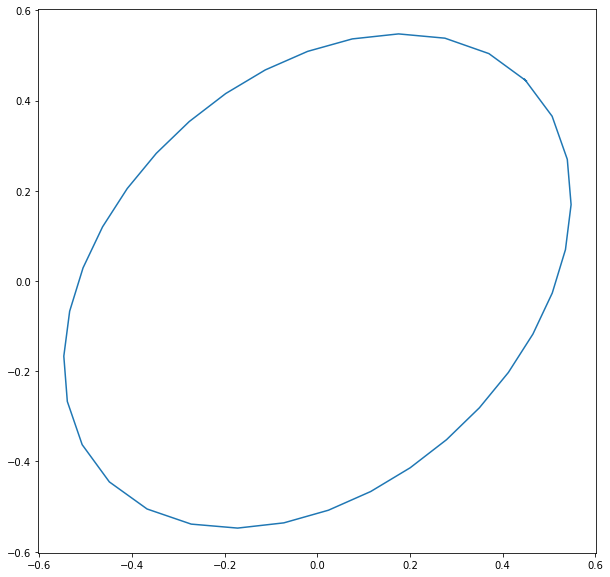

In [90]:
## On regarde pour la courbe de niveau 0.8 de la fonction f1

c = .8
x0, y0 = Newton(F, .6, .6)
T = level_curve_interpole(f1, x0, y0)

plt.plot(T[0, :], T[1, :]);

95 étapes nécessaires


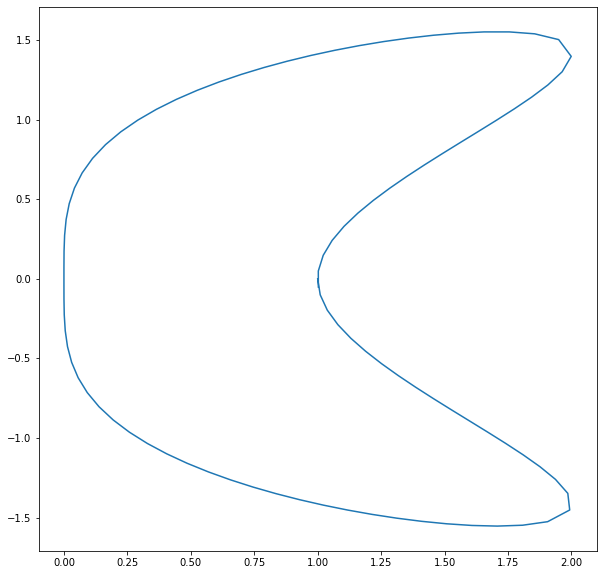

In [85]:
## On regarde pour la courbe de niveau 1.0 de la fonction f2

c = 1.
T = level_curve_finie(f2, 1., 0.)

plt.plot(T[0, :], T[1, :]);

122 étapes nécessaires


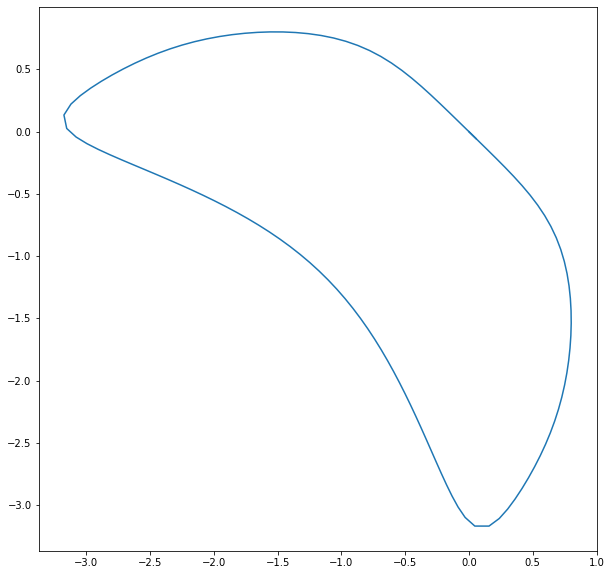

In [86]:
## On regarde pour la courbe de niveau f3(0., 0.) de la fonction f3

c = f3(0., 0.)
T = level_curve_finie(f3, 0., 0.)

plt.plot(T[0, :], T[1, :]);